In [161]:
import pandas as pd
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns

df_tweet = pd.read_csv('tweet_modified.csv',low_memory=False)
df_tweet = df_tweet.drop(df_tweet.index[-1])
df_location = pd.read_csv('location.csv',low_memory=False)

In [162]:
tweet_id_path = 'dfTweetidSentiment.csv\dfTweetidSentiment.csv'
dataframes = []

# Iterate over all files in the directory
for filename in os.listdir(tweet_id_path):
    if filename.endswith(".csv"):
        file_path = os.path.join(tweet_id_path, filename)
        
        # Read the CSV file into a DataFrame
        df = pd.read_csv(file_path)
        
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all DataFrames into a single DataFrame
tw_id_df = pd.concat(dataframes, ignore_index=True)
tw_with_sentiment_df = pd.merge(df_tweet, tw_id_df, on='tweetid')

In [163]:
# combine location with tweet
merged_df = pd.merge(tw_with_sentiment_df, df_location[['locationid', 'country']], on='locationid', how='left')


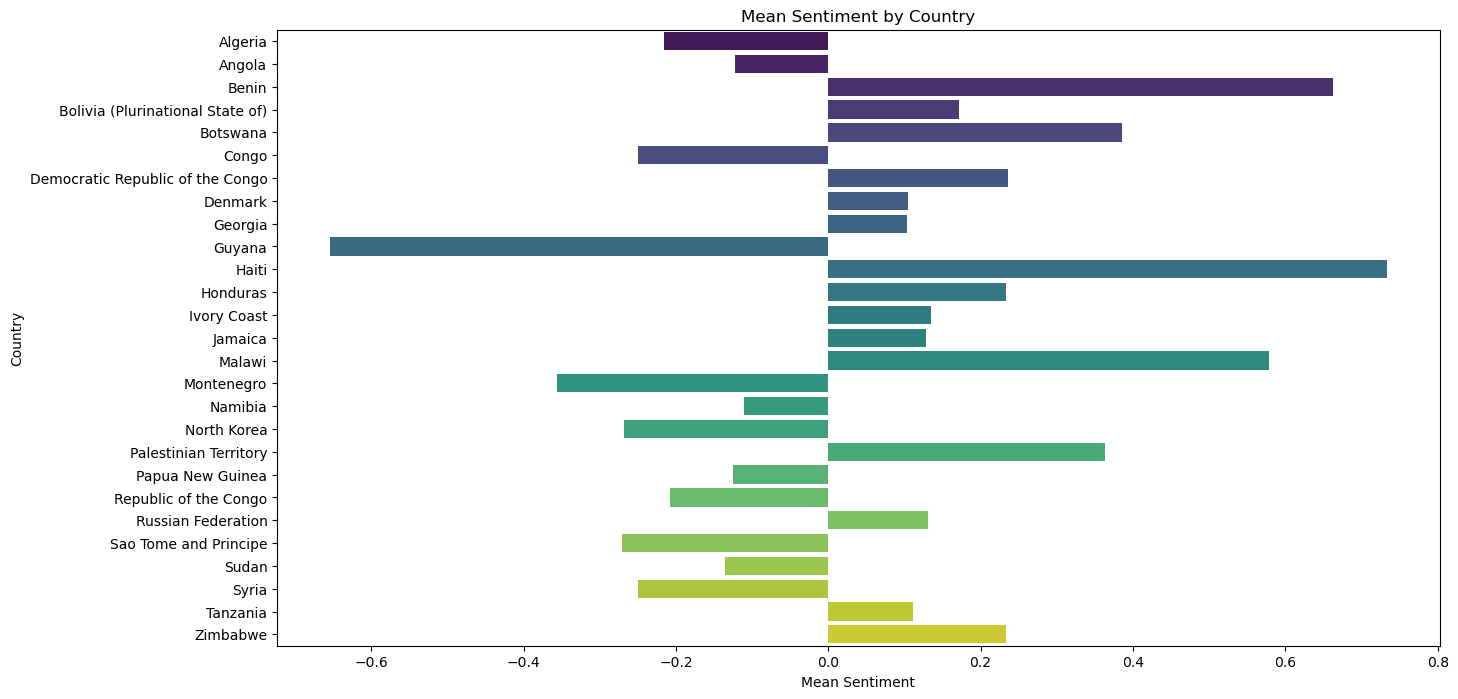

In [164]:
# sentiment analysis by country

mean_sentiment_by_country = merged_df.groupby('country')['sentiment'].mean().reset_index()
extreme_sentiment_country = mean_sentiment_by_country[abs(mean_sentiment_by_country['sentiment']) > 0.1]

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a bar plot
sns.barplot(x='sentiment', y='country', data=extreme_sentiment_country, palette='viridis')

# Set the title and labels
plt.title('Mean Sentiment by Country')
plt.xlabel('Mean Sentiment')
plt.ylabel('Country')

# Show the plot
plt.show()


In [165]:
# extract all hashtags from the text
def findHashtags(text):
    # Check if the value is a string before processing
    if isinstance(text, str):
        # Implementation to extract hashtags from the text
        # This is just an example, you may need to modify it based on your specific requirements
        return [tag.strip('#') for tag in text.split() if tag.startswith('#')]
    else:
        return []
merged_df['tags'] = merged_df['text'].apply(findHashtags)
merged_df = merged_df.explode('tags')


In [166]:
tag_counts = merged_df['tags'].value_counts()
frequent_hashtag_df = merged_df[merged_df['tags'].isin(tag_counts[tag_counts > 800].index)]
frequent_hashtag_df = frequent_hashtag_df.dropna(subset=['tags', 'sentiment'])

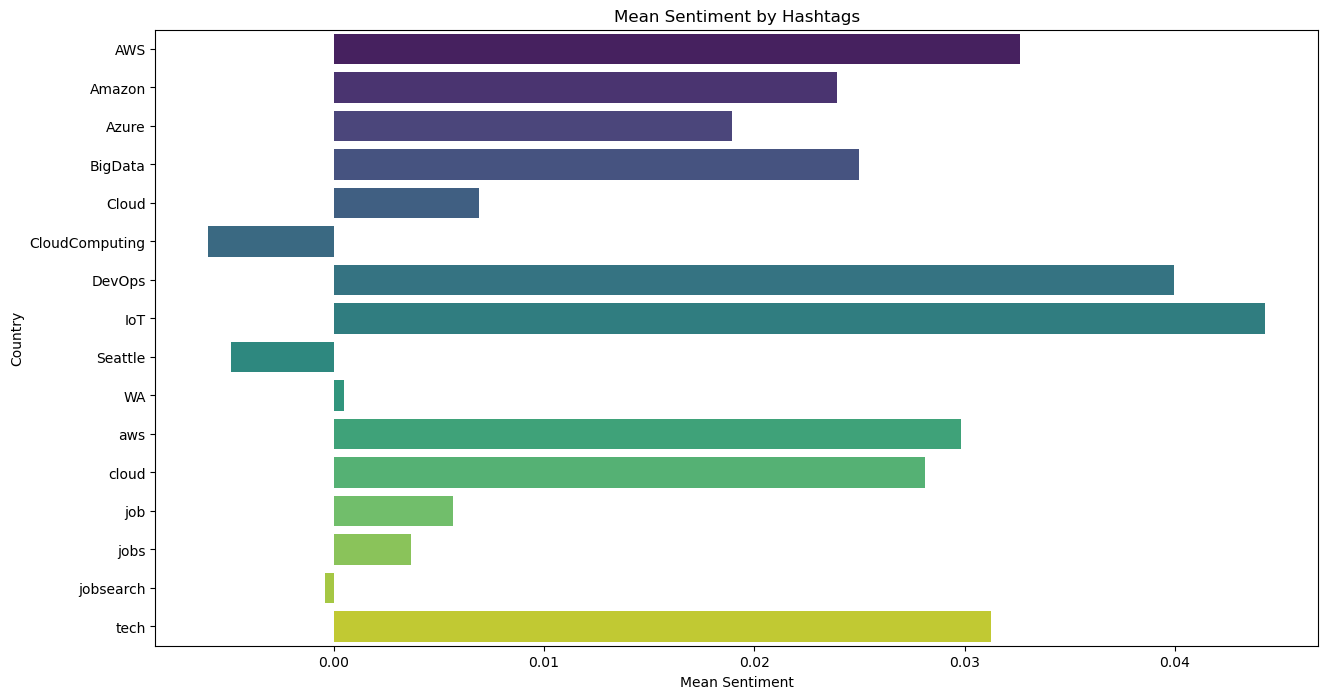

In [167]:
# sentiment analysis by hashtags
mean_sentiment_by_tags = frequent_hashtag_df.groupby('tags')['sentiment'].mean().reset_index()
extreme_sentiment_tag = mean_sentiment_by_tags[abs(mean_sentiment_by_tags['sentiment']) > 0]

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a bar plot
sns.barplot(x='sentiment', y='tags', data=extreme_sentiment_tag, palette='viridis')

# Set the title and labels
plt.title('Mean Sentiment by Hashtags')
plt.xlabel('Mean Sentiment')
plt.ylabel('Country')

# Show the plot
plt.show()


In [168]:
top_10_first_hashtags = merged_df['tags'].value_counts().nlargest(10)
top_10_first_hashtags

AWS          19237
aws           5456
cloud         3736
job           3609
jobs          3016
Cloud         2443
BigData       1595
jobsearch     1486
Azure         1189
DevOps        1055
Name: tags, dtype: int64

In [169]:
top_10_country = merged_df['country'].value_counts().nlargest(10)
top_10_country

United States     90697
United Kingdom    16260
India             11348
Germany            6125
France             5648
Australia          4290
Spain              3188
Ireland            2985
Canada             1859
Brazil             1787
Name: country, dtype: int64

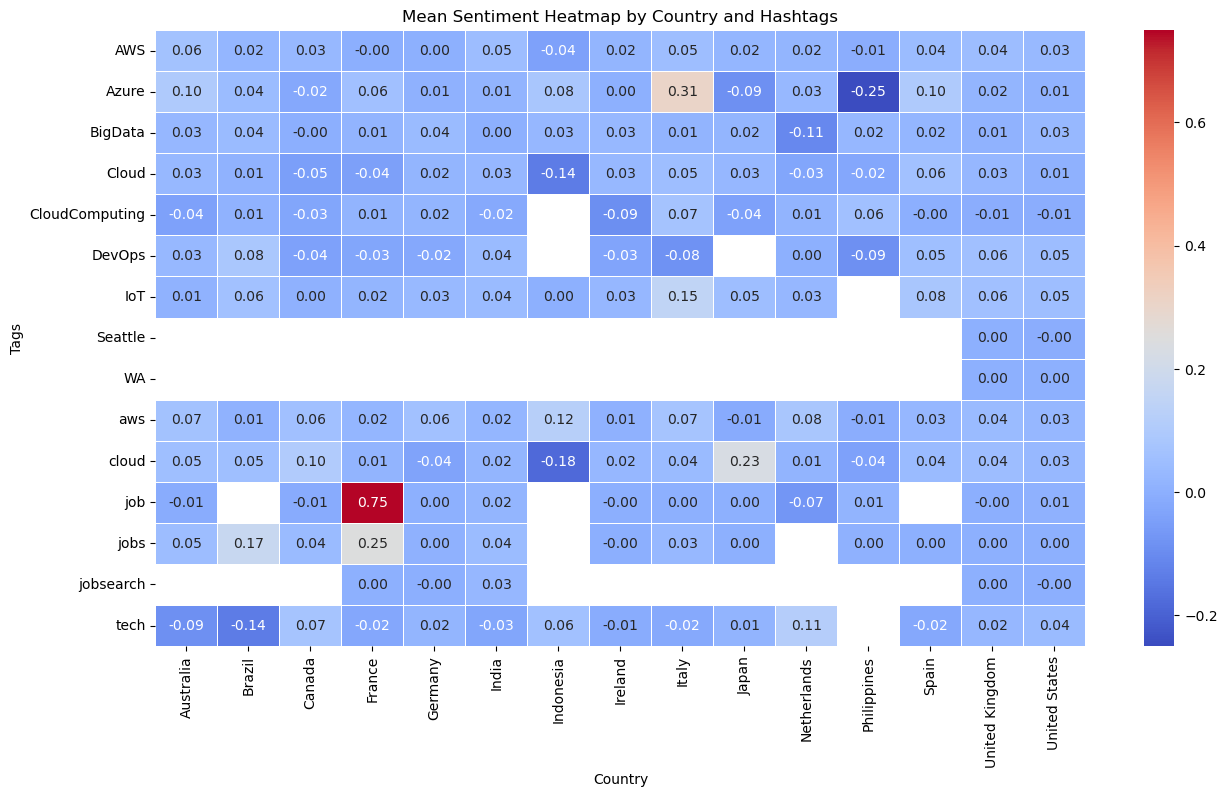

In [170]:
# Select the top 10 frequent countries
top_10_countries = merged_df['country'].value_counts().nlargest(15).index

# Select the top 10 frequent tags
top_10_tags = merged_df['tags'].explode().value_counts().nlargest(15).index

# Filter the dataframe based on the selected countries and tags
filtered_df = merged_df[merged_df['country'].isin(top_10_countries) & merged_df['tags'].explode().isin(top_10_tags)]

# Compute mean sentiment with respect to 'country' and 'tags'
mean_sentiment_by_country_tags = filtered_df.groupby(['country', 'tags'])['sentiment'].mean().reset_index()

# Pivot the dataframe to create a matrix suitable for a heatmap
heatmap_data = mean_sentiment_by_country_tags.pivot_table(index='tags', columns='country', values='sentiment', aggfunc='mean')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Create a heatmap
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)

# Set the title and labels
plt.title('Mean Sentiment Heatmap by Country and Hashtags')
plt.xlabel('Country')
plt.ylabel('Tags')

# Show the plot
plt.show()


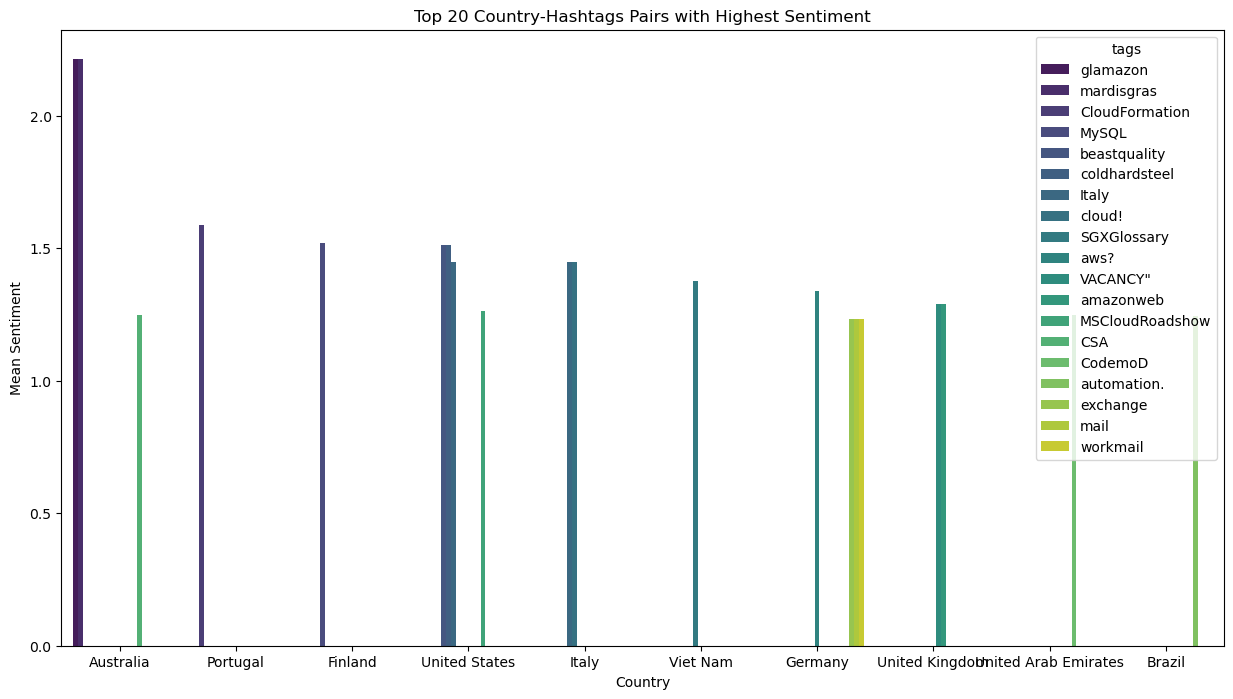

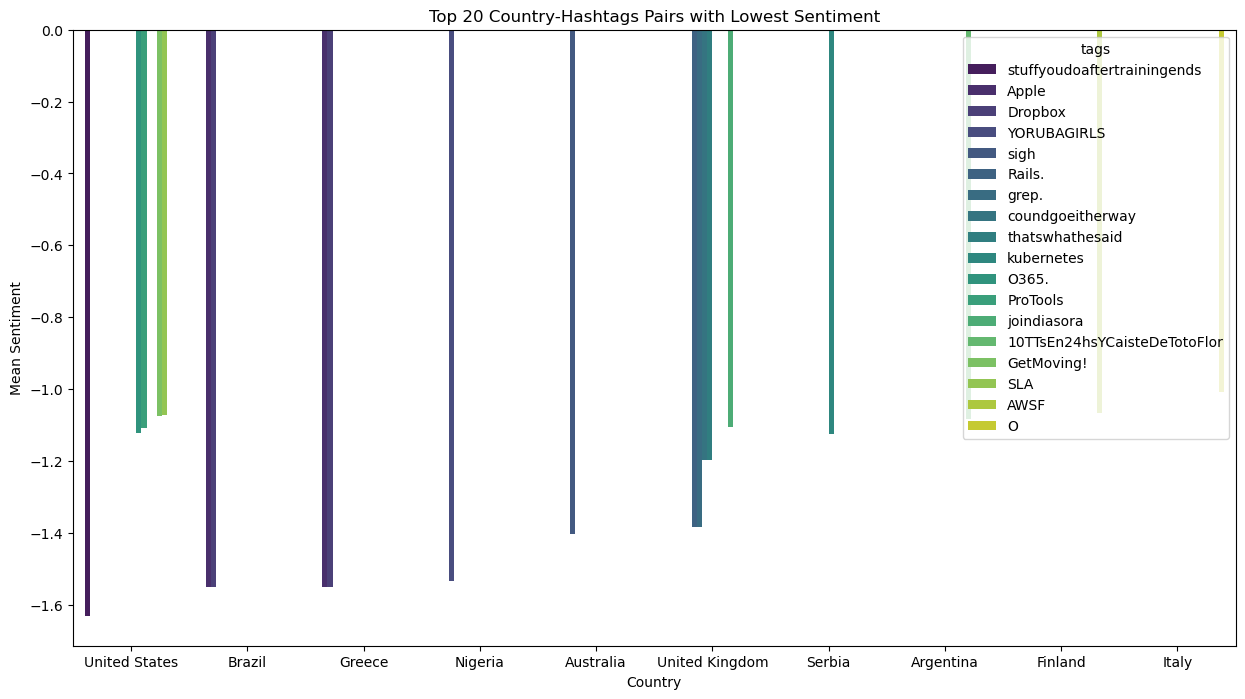

Top 20 Country-Hashtags Pairs with Highest Sentiment:
                    country             tags  sentiment
670               Australia         glamazon   2.214286
732               Australia       mardisgras   2.214286
8786               Portugal   CloudFormation   1.587471
2552                Finland            MySQL   1.520833
16350         United States     beastquality   1.511458
16617         United States    coldhardsteel   1.511458
6834                  Italy            Italy   1.450000
6931                  Italy           cloud!   1.450000
14397         United States            Italy   1.450000
18706              Viet Nam      SGXGlossary   1.377083
4208                Germany             aws?   1.339286
11558        United Kingdom         VACANCY"   1.290179
11637        United Kingdom        amazonweb   1.290179
14613         United States  MSCloudRoadshow   1.261561
279               Australia              CSA   1.250000
10424  United Arab Emirates          CodemoD   1.2

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have the dataframe named tags1_df

# Compute mean sentiment with respect to 'country' and 'tags'
mean_sentiment_by_country_tags = merged_df.groupby(['country', 'tags'])['sentiment'].mean().reset_index()

# Select the top 20 country-tags pairs with the highest sentiment
top_20_high_sentiment = mean_sentiment_by_country_tags.nlargest(20, 'sentiment')

# Select the top 20 country-tags pairs with the lowest sentiment
top_20_low_sentiment = mean_sentiment_by_country_tags.nsmallest(20, 'sentiment')

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Plot the top 20 highest sentiment country-tags pairs
sns.barplot(x='country', y='sentiment', hue='tags', data=top_20_high_sentiment, palette='viridis')
plt.title('Top 20 Country-Hashtags Pairs with Highest Sentiment')
plt.xlabel('Country')
plt.ylabel('Mean Sentiment')

# Show the plot
plt.show()

# Set the size of the plot
plt.figure(figsize=(15, 8))

# Plot the top 20 lowest sentiment country-tags pairs
sns.barplot(x='country', y='sentiment', hue='tags', data=top_20_low_sentiment, palette='viridis')
plt.title('Top 20 Country-Hashtags Pairs with Lowest Sentiment')
plt.xlabel('Country')
plt.ylabel('Mean Sentiment')

# Show the plot
plt.show()
# Display the top 20 highest sentiment country-tags pairs
print("Top 20 Country-Hashtags Pairs with Highest Sentiment:")
print(top_20_high_sentiment)

# Display the top 20 lowest sentiment country-tags pairs
print("\nTop 20 Country-Hashtags Pairs with Lowest Sentiment:")
print(top_20_low_sentiment)
